# Müşteri Kişilik Analizi

- Yazar: Bora Dere
- Son güncelleme: 24/02/2024
- İletişim: boradere@hotmail.com.tr

## 1- Verinin Ön İşlemesi

### 1.1- Importlar ve Veri Setinin Yüklenmesi

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

sns.set_theme(style='darkgrid', palette='viridis')
warnings.filterwarnings('ignore')

data = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df = pd.DataFrame(data)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

### 1.2- Verinin İncelenmesi ve İşlenmesi

Özellikleri incelersek 4 ayrı kategoriye dağıldıklarını görüyoruz. Bunlar:

**Müşteriler:**
* **ID:** Müşterinin benzersiz tanımlayıcısı
* **Year_Birth:** Müşterinin doğum yılı
* **Education:** Müşterinin eğitim düzeyi
* **Marital_Status:** Müşterinin medeni durumu
* **Income:** Müşterinin yıllık hane geliri
* **Kidhome:** Müşterinin hane halkındaki çocuk sayısı
* **Teenhome:** Müşterinin hane halkındaki genç sayısı
* **Dt_Customer:** Müşterinin şirkete kayıt tarih
* **Recency:** Müşterinin son satın almadan bu yana geçen gün sayısı
* **Complain:** Müşterinin son 2 yılda şikayette bulunup bulunmadığı (1: Evet, 0: Hayır)

**Ürünler:**

* **MntWines:** Son 2 yılda şaraba harcanan miktar
* **MntFruits:** Son 2 yılda meyveye harcanan miktar
* **MntMeatProducts:** Son 2 yılda ete harcanan miktar
* **MntFishProducts:** Son 2 yılda balığa harcanan miktar
* **MntSweetProducts:** Son 2 yılda tatlılara harcanan miktar
* **MntGoldProds:** Son 2 yılda altına harcanan miktar

**Promosyon:**

* **NumDealsPurchases:** İndirimli alışveriş yapılan toplam satın alma sayısı
* **AcceptedCmp1:** Müşterinin 1. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp2:** Müşterinin 2. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp3:** Müşterinin 3. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp4:** Müşterinin 4. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **AcceptedCmp5:** Müşterinin 5. kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)
* **Response:** Müşterinin son kampanyadaki teklifi kabul edip etmediği (1: Evet, 0: Hayır)

**Yer:**

* **NumWebPurchases:** Web sitesi üzerinden yapılan satın alma sayısı
* **NumCatalogPurchases:** Katalog kullanılarak yapılan satın alma sayısı
* **NumStorePurchases:** Mağazalardan doğrudan yapılan satın alma sayısı
* **NumWebVisitsMonth:** Son ay içinde şirket web sitesine yapılan ziyaret sayısı

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID ve Dt_Customer işimize yaramayan özellikler olduğu için bunları atıyoruz.

In [47]:
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0          58       635         88              546  ...                  7   
1          38        11          1                6  ...                  5   
2          26       426         49              127  ...                  4   
3          26        11          4               20  ...                  6   
4          94       173         43              118  ...                  5   
...       ...       ...        ...              ...  ...                ...   
2235       46       709         43              182  ...                  5   
2236       56       406          0               30  ...                  7   
2237       91       908         48              217  ...                  6   
2238        8       428         30              214  ...                  3   
2239       40        84          3               61  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 27 columns]

Herhangi bir boş değer var mı kontrol ediyoruz.

In [48]:
(df.isnull().sum()/len(df))*100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Income özelliğinin 1% civarı NaN değerlerden oluşuyor. Bu oran çok da yüksek olmadığı için herhangi bir detaylı imputation yöntemiyle uğraşmaktansa boş verileri droplayıp geçiyoruz.

In [49]:
df = df.dropna()
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Kopya girdi olup olmadığına bakıyoruz.

In [50]:
df.duplicated().sum()

182

182 adet kopya girdi varmış. Bunları atıyoruz, zira aynı veriden birden fazla olmasına ihtiyacımız yok.

In [51]:
df.drop_duplicates(inplace=True)
df

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0           1957  Graduation         Single   58138.0        0         0   
1           1954  Graduation         Single   46344.0        1         1   
2           1965  Graduation       Together   71613.0        0         0   
3           1984  Graduation       Together   26646.0        1         0   
4           1981         PhD        Married   58293.0        1         0   
...          ...         ...            ...       ...      ...       ...   
2233        1977  Graduation       Together  666666.0        1         0   
2235        1967  Graduation        Married   61223.0        0         1   
2237        1981  Graduation       Divorced   56981.0        0         0   
2238        1956      Master       Together   69245.0        0         1   
2239        1954         PhD        Married   52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0          58       635         88              546  ...                  7   
1          38        11          1                6  ...                  5   
2          26       426         49              127  ...                  4   
3          26        11          4               20  ...                  6   
4          94       173         43              118  ...                  5   
...       ...       ...        ...              ...  ...                ...   
2233       23         9         14               18  ...                  6   
2235       46       709         43              182  ...                  5   
2237       91       908         48              217  ...                  6   
2238        8       428         30              214  ...                  3   
2239       40        84          3               61  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2233             0             0             0             0             0   
2235             0             0             0             0             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2233         0              3         11         0  
2235         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2034 rows x 27 columns]

Elimizde 27 adet özellik var. 3x9'luk bir gridde hepsinin dağılımını inceliyoruz.

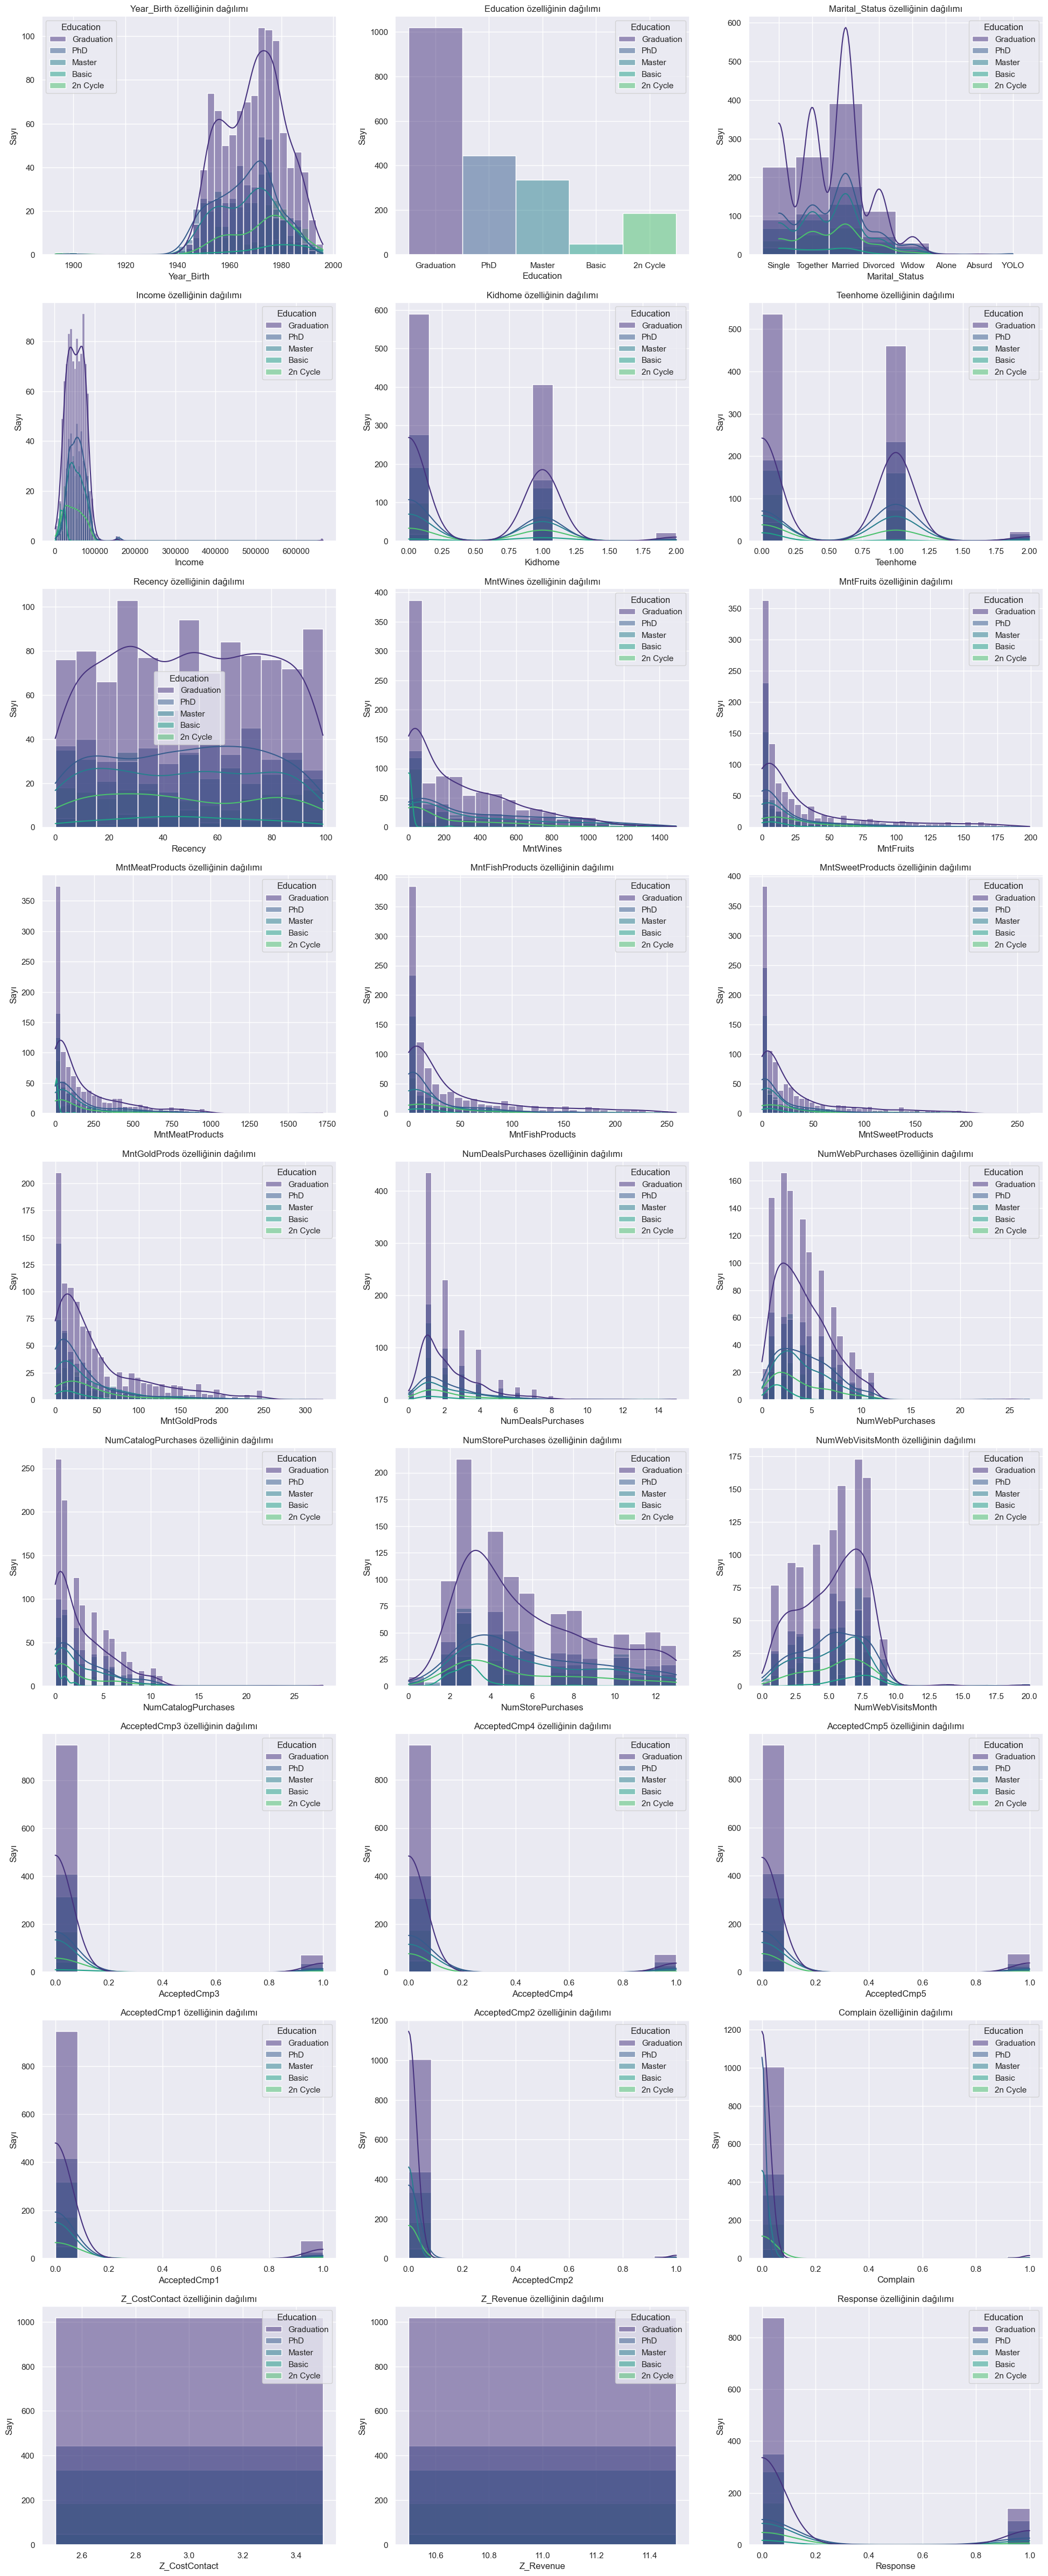

In [52]:
plt.figure(figsize=(24, 45 + 2*8))

for i, col in enumerate(df.columns):
    plt.subplot(9, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, hue='Education')
    plt.ylabel('Sayı')
    plt.title(f"{col} özelliğinin dağılımı")

Bir de boxplot kullanarak bakalım.

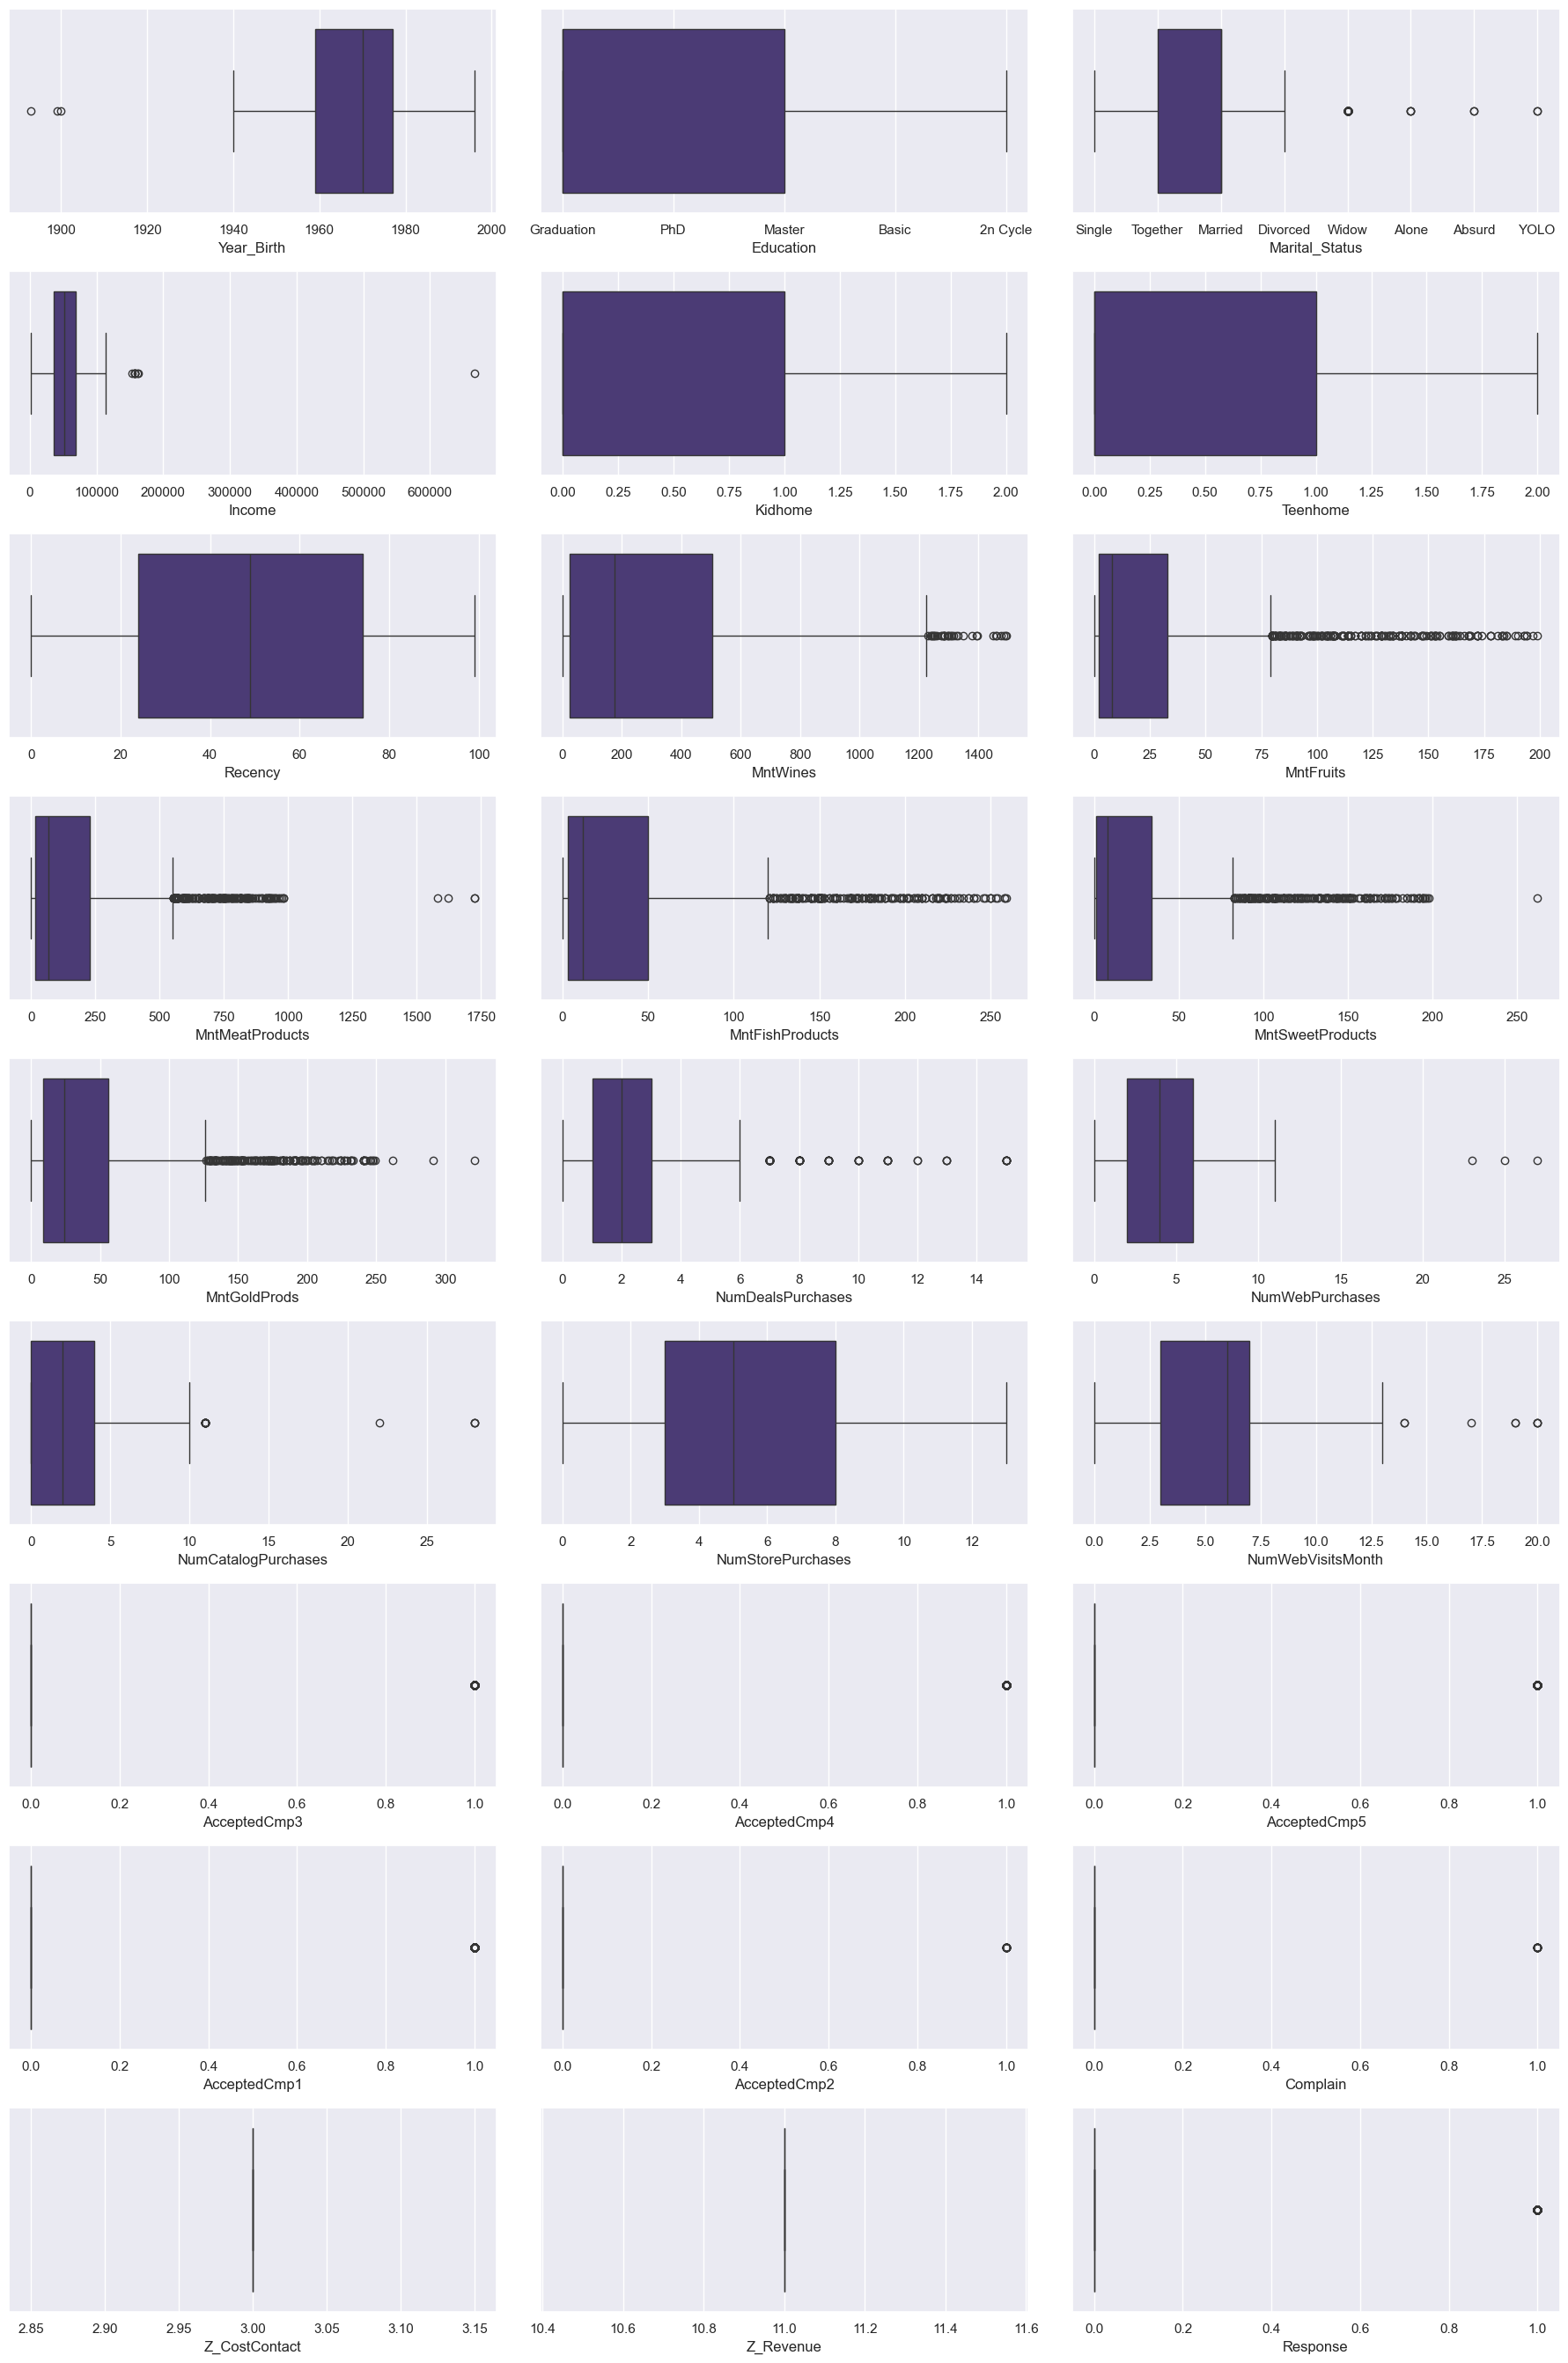

In [53]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(df.columns):
    plt.subplot(9, 3, i+1)
    sns.boxplot(data=df, x=col)

plt.tight_layout()

Belirli özelliklerde hatırı sayılır miktarda outlier var gibi gözüküyor ancak outlierları atmak kümeleri bozabilir. Bu yüzden en azından şimdilik outlierlar hakkında herhangi bir şey yapmayacağız.

Dağılımlara biraz daha bakınca Z_CostContact ve Z_Revenue da gerekli gibi görünmüyor. Zaten veride açıklamaları da bulunmuyor, bu özellikleri de atıyoruz.

In [54]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
df

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0           1957  Graduation         Single   58138.0        0         0   
1           1954  Graduation         Single   46344.0        1         1   
2           1965  Graduation       Together   71613.0        0         0   
3           1984  Graduation       Together   26646.0        1         0   
4           1981         PhD        Married   58293.0        1         0   
...          ...         ...            ...       ...      ...       ...   
2233        1977  Graduation       Together  666666.0        1         0   
2235        1967  Graduation        Married   61223.0        0         1   
2237        1981  Graduation       Divorced   56981.0        0         0   
2238        1956      Master       Together   69245.0        0         1   
2239        1954         PhD        Married   52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0          58       635         88              546  ...                   10   
1          38        11          1                6  ...                    1   
2          26       426         49              127  ...                    2   
3          26        11          4               20  ...                    0   
4          94       173         43              118  ...                    3   
...       ...       ...        ...              ...  ...                  ...   
2233       23         9         14               18  ...                    1   
2235       46       709         43              182  ...                    3   
2237       91       908         48              217  ...                    3   
2238        8       428         30              214  ...                    5   
2239       40        84          3               61  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2233                  3                  6             0             0   
2235                  4                  5             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2233             0             0             0         0         0  
2235             0             0             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2034 rows x 25 columns]

Year_Birth özelliği pek gerekli gibi gelmiyor. Öte yandan yaş önemli olabilir. Bu yüzden yaş için yeni bir özellik oluşturup işlevsiz özelliği atıyoruz. Yaş hesabı için 2021'i kullanacağız çünkü veri Ağustos 2021'de erişime açılmış.

In [55]:
df['Age'] = 2021 - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

df

Education Marital_Status    Income  Kidhome  Teenhome  Recency  \
0     Graduation         Single   58138.0        0         0       58   
1     Graduation         Single   46344.0        1         1       38   
2     Graduation       Together   71613.0        0         0       26   
3     Graduation       Together   26646.0        1         0       26   
4            PhD        Married   58293.0        1         0       94   
...          ...            ...       ...      ...       ...      ...   
2233  Graduation       Together  666666.0        1         0       23   
2235  Graduation        Married   61223.0        0         1       46   
2237  Graduation       Divorced   56981.0        0         0       91   
2238      Master       Together   69245.0        0         1        8   
2239         PhD        Married   52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2233         9         14               18                8  ...   
2235       709         43              182               42  ...   
2237       908         48              217               32  ...   
2238       428         30              214               80  ...   
2239        84          3               61                2  ...   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2233                  3                  6             0             0   
2235                  4                  5             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  
0                0             0             0         0         1   64  
1                0             0             0         0         0   67  
2                0             0             0         0         0   56  
3                0             0             0         0         0   37  
4                0             0             0         0         0   40  
...            ...           ...           ...       ...       ...  ...  
2233             0             0             0         0         0   44  
2235             0             0             0         0         0   54  
2237             0             0             0         0         0   40  
2238             0             0             0         0         0   65  
2239             0             0             0         0         1   67  

[2034 rows x 25 columns]

Nasıl bir encoding yöntemi uygulayacağımıza veya bu özellikleri atıp atmayacağımıza karar vermek için kategorik özellikleri biraz daha inceliyoruz. 

In [56]:
print(pd.unique(df['Education']))
print(pd.unique(df['Marital_Status']))

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Bazıları aynı kapıya çıkıyor. Bunları aynı değere encodelamak doğru olacaktır.

In [57]:
f = {'Basic': 0, 'Graduation': 1, 'Master': 2, '2n Cycle': 2, 'PhD': 3}
g = {'YOLO': 0, 'Absurd': 0, 'Single': 1, 'Alone': 1, 'Together': 2, 'Married': 2, 'Divorced': 3, 'Widow': 3}

df['Education'] = df['Education'].map(f).astype(int)
df['Marital_Status'] = df['Marital_Status'].map(g).astype(int)

df

Education  Marital_Status    Income  Kidhome  Teenhome  Recency  \
0             1               1   58138.0        0         0       58   
1             1               1   46344.0        1         1       38   
2             1               2   71613.0        0         0       26   
3             1               2   26646.0        1         0       26   
4             3               2   58293.0        1         0       94   
...         ...             ...       ...      ...       ...      ...   
2233          1               2  666666.0        1         0       23   
2235          1               2   61223.0        0         1       46   
2237          1               3   56981.0        0         0       91   
2238          2               2   69245.0        0         1        8   
2239          3               2   52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2233         9         14               18                8  ...   
2235       709         43              182               42  ...   
2237       908         48              217               32  ...   
2238       428         30              214               80  ...   
2239        84          3               61                2  ...   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2233                  3                  6             0             0   
2235                  4                  5             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  
0                0             0             0         0         1   64  
1                0             0             0         0         0   67  
2                0             0             0         0         0   56  
3                0             0             0         0         0   37  
4                0             0             0         0         0   40  
...            ...           ...           ...       ...       ...  ...  
2233             0             0             0         0         0   44  
2235             0             0             0         0         0   54  
2237             0             0             0         0         0   40  
2238             0             0             0         0         0   65  
2239             0             0             0         0         1   67  

[2034 rows x 25 columns]

Şimdi veriyi scale etmemiz gerekiyor. Değerleri 0 ile 1 arasına sıkıştırdığı için MinMaxScaler kullanacağız.

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

Education  Marital_Status    Income  Kidhome  Teenhome   Recency  \
0      0.333333        0.333333  0.084832      0.0       0.0  0.585859   
1      0.333333        0.333333  0.067095      0.5       0.5  0.383838   
2      0.333333        0.666667  0.105097      0.0       0.0  0.262626   
3      0.333333        0.666667  0.037471      0.5       0.0  0.262626   
4      1.000000        0.666667  0.085065      0.5       0.0  0.949495   
...         ...             ...       ...      ...       ...       ...   
2029   0.333333        0.666667  1.000000      0.5       0.0  0.232323   
2030   0.333333        0.666667  0.089472      0.0       0.5  0.464646   
2031   0.333333        1.000000  0.083092      0.0       0.0  0.919192   
2032   0.666667        0.666667  0.101536      0.0       0.5  0.080808   
2033   1.000000        0.666667  0.076908      0.5       0.5  0.404040   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0     0.425318   0.442211         0.316522         0.664093  ...   
1     0.007368   0.005025         0.003478         0.007722  ...   
2     0.285332   0.246231         0.073623         0.428571  ...   
3     0.007368   0.020101         0.011594         0.038610  ...   
4     0.115874   0.216080         0.068406         0.177606  ...   
...        ...        ...              ...              ...  ...   
2029  0.006028   0.070352         0.010435         0.030888  ...   
2030  0.474883   0.216080         0.105507         0.162162  ...   
2031  0.608171   0.241206         0.125797         0.123552  ...   
2032  0.286671   0.150754         0.124058         0.308880  ...   
2033  0.056263   0.015075         0.035362         0.007722  ...   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0              0.307692               0.35           0.0           0.0   
1              0.153846               0.25           0.0           0.0   
2              0.769231               0.20           0.0           0.0   
3              0.307692               0.30           0.0           0.0   
4              0.461538               0.25           0.0           0.0   
...                 ...                ...           ...           ...   
2029           0.230769               0.30           0.0           0.0   
2030           0.307692               0.25           0.0           0.0   
2031           1.000000               0.30           0.0           1.0   
2032           0.769231               0.15           0.0           0.0   
2033           0.307692               0.35           0.0           0.0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response       Age  
0              0.0           0.0           0.0       0.0       1.0  0.378641  
1              0.0           0.0           0.0       0.0       0.0  0.407767  
2              0.0           0.0           0.0       0.0       0.0  0.300971  
3              0.0           0.0           0.0       0.0       0.0  0.116505  
4              0.0           0.0           0.0       0.0       0.0  0.145631  
...            ...           ...           ...       ...       ...       ...  
2029           0.0           0.0           0.0       0.0       0.0  0.184466  
2030           0.0           0.0           0.0       0.0       0.0  0.281553  
2031           0.0           0.0           0.0       0.0       0.0  0.145631  
2032           0.0           0.0           0.0       0.0       0.0  0.388350  
2033           0.0           0.0           0.0       0.0       1.0  0.407767  

[2034 rows x 25 columns]

Şu şekildeki verinin korelasyonunu inceleyelim.

<AxesSubplot: >

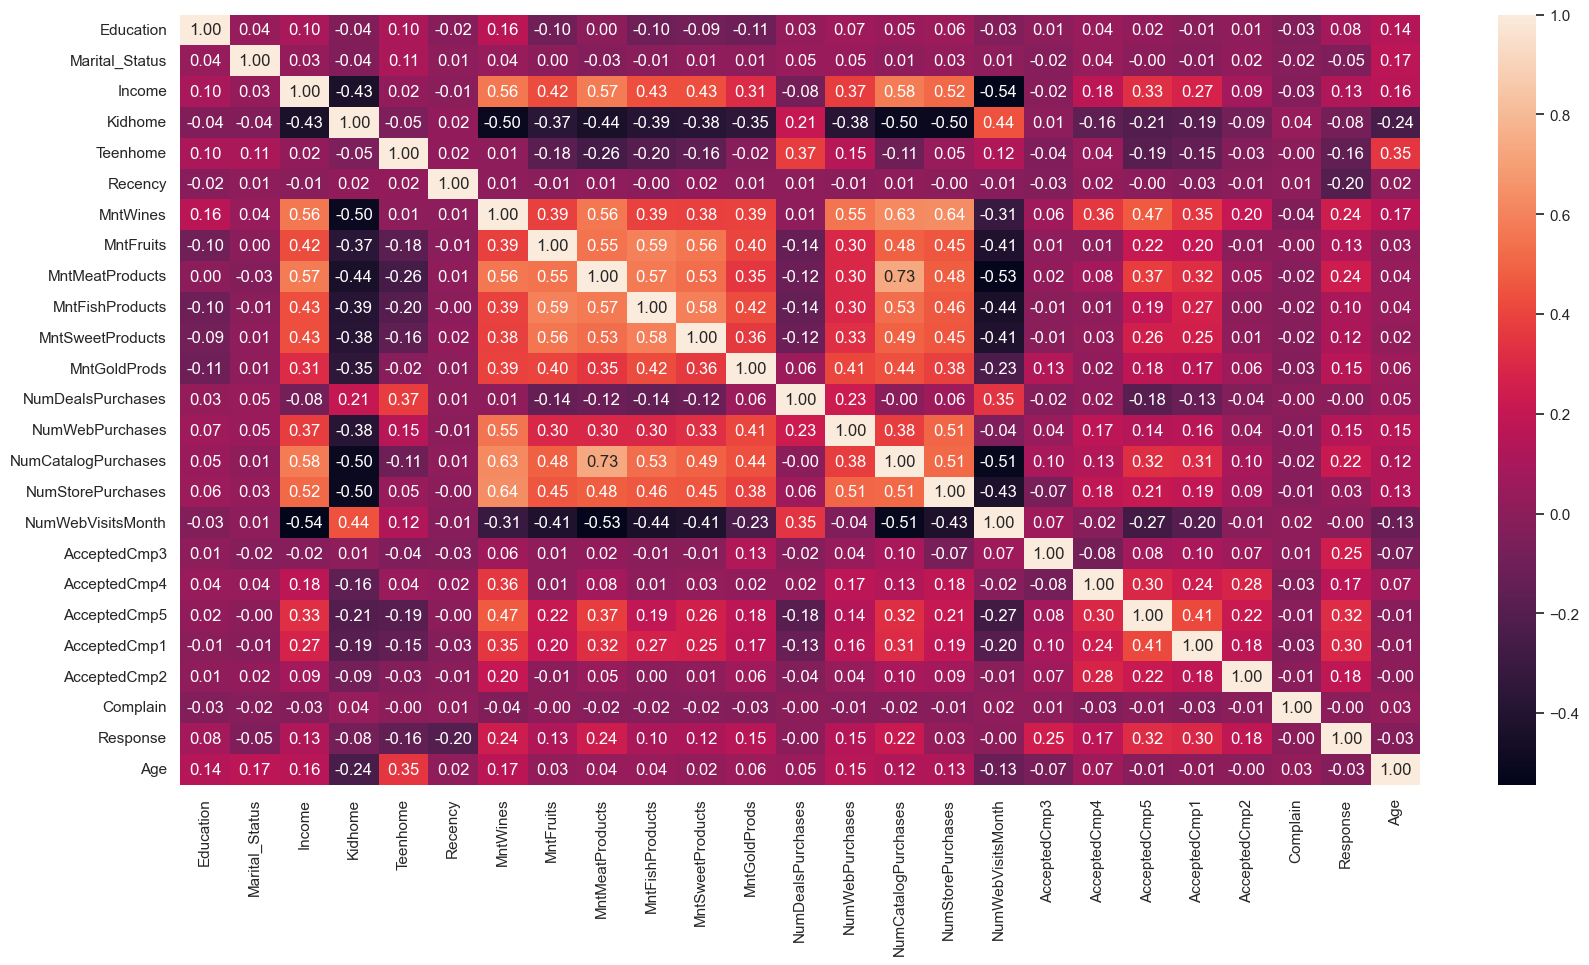

In [60]:
plt.figure(figsize=(20, 10))

corr = df.corr()

sns.heatmap(corr, fmt='.2f', annot=True)

Bu matrise bakarak yapabileceğimiz bazı çıkarım ve öneriler:
* Gelir arttıkça aylık olarak şarap, et ürünleri gibi kalemlerde yapılan harcamaların miktarı artıyormuş. Beklendik bir şey. 
* Gelir arttıkça 5. kampanyayı kabul etme oranı artıyormuş. 5. kampanyanın içeriği gurme ürünler gamıyla genişletilebilir veya bu tarz ürünlerle 5. kampanya harmanlanarak yeni bir kampanya türetilebilir.
* Gelir arttıkça katalog ve mağazadan yapılan alışverişler artıyormuş. İlgili kampanyalar kataloglarda halihazırda bulunmuyorsa yerleştirilebilir.
* Çocuk sayısı arttıkça web sayfasına olan ziyaretler artıyor ancak alışveriş miktarı azalıyormuş. Arananın bulunamaması gibi bir etkeni göz önünce bulundurarak çocuklara yönelik ürünlerin ilgi çekici reklam ve sloganlarla ana sayfada yer etmesi sağlanabilir.
* Genel olarak çocuk ve genç sayısı (çalışmayan kitle) arttıkça indirim türevi fırsatlara rağbet artıyormuş. Genç ve çocuklara yönelik ürünlerde genel olarak çeşitli miktarlarda indirim veya kampanya uygulanırsa talep ve dolayısıyla satış miktarı artacağı için bu kalemlerde genel getiri ve rağbet artabilir.
* Şarap ürünleri üç şekilde de oldukça talep görüyor. Gurme bir ürün olduğu göz önünde bulundurulduğunda meraklısı için özel köşeler yaratılması daha maliyetli ürünlere olan ilgiyi ve şarap ürünleri üzerindeki genel ilgiyi artırabilir.
* Şarap ürünleri ile çoğu gıda ürünleri ilişkili olsa da et ürünleri ile daha fazla bir bağıntı görünüyor. Bazı sık tercih edilen şaraplar et reyonlarına yakın yerleştirilebilir veya reyonda kullanılan tema itibariyle şarap çağrışımı yapılabilir.
* Et, meyve gibi ürünlerde pek indirim kovalanmadığı görüşüne kapılabiliriz. Bu başta pek mantıklı gibi görünmese de bu marketin genel müşterisinin gıda konusunda kısmak istemediği yönünde yorumlanabilir. Bunu test amaçlı politikalarda ufak deneme değişikliklerine gidilip en kötü durumda kardan ufak bir zararı göz önünde bulundurup yorumumuzun doğru olması koşulunda yapacağımız kalıcı değişikliklerin getireceği kazancın peşinden gidilebilir.
* Siteye yapılan ziyaretler arttıkça faydalanılan indirim sayısı artıyor gibi. Sitedeki indirim duyurularının başarılı olduğu görüşünü savunabiliriz.


Veriye PCA uyguladığımız yeni bir veri oluşturacağız. Bu iki ayrı veri üzerinde clustering denemeleri yapıp daha başarılı sonuç vereni tercih edeceğiz.

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=0.8)
components = pca.fit_transform(df)

cols = ['PC' + str(i) for i in range(1, len(pca.components_) + 1)]

pca_df = pd.DataFrame(components, columns=cols)
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.748978  0.319108 -0.418887 -0.133678  0.206362  0.114722 -0.670827   
1    -0.541452  0.115682 -0.031827 -0.033220 -0.184853  0.184033  0.021952   
2     0.232250 -0.307358 -0.309106 -0.315566 -0.166352 -0.050261  0.019906   
3    -0.431031  0.183818 -0.311406 -0.056932 -0.283836 -0.081345  0.091984   
4    -0.217693 -0.124514  0.003886  0.351796  0.338198 -0.457472 -0.138257   
...        ...       ...       ...       ...       ...       ...       ...   
2029 -0.392872  0.174904 -0.289589 -0.092775 -0.283398 -0.064589  0.087698   
2030  0.184473 -0.369894 -0.052150 -0.216378  0.030752  0.330184 -0.050018   
2031  0.461904 -0.504236  0.158022  0.600502 -0.351332  0.163578 -0.028808   
2032  0.184241 -0.313379  0.218807 -0.539275 -0.100792 -0.029144  0.078745   
2033 -0.051889  0.778539  0.490381 -0.120811  0.204015 -0.104553 -0.480165   

           PC8       PC9      PC10  
0    -0.146110  0.061026  0.182187  
1     0.133062  0.065032  0.279004  
2    -0.161937  0.005065 -0.054733  
3    -0.024346  0.045268 -0.090852  
4     0.014350  0.242793 -0.160713  
...        ...       ...       ...  
2029  0.007053  0.064456 -0.108085  
2030  0.054554 -0.070670  0.007159  
2031 -0.669447  0.118749 -0.407335  
2032  0.034451  0.013292  0.017732  
2033  0.171629  0.021585 -0.036464  

[2034 rows x 10 columns]

İki veriyi de clustering uygulamadan önce PCA uygulanan veriyi görüntülemeyi deneyelim. Gözle seçilebilen kümeler olmasa bile en azından bir başlangıç fikrimiz olsun.

In [63]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'PC3')

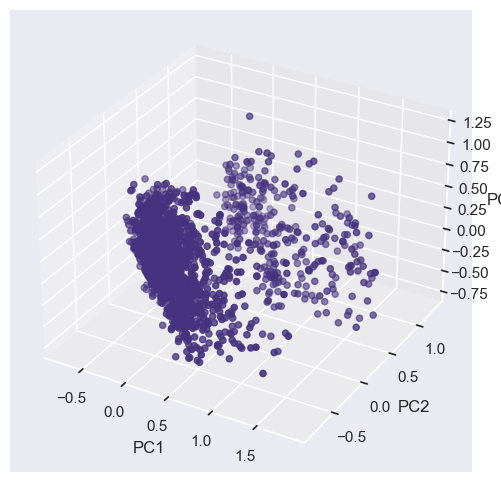

In [64]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

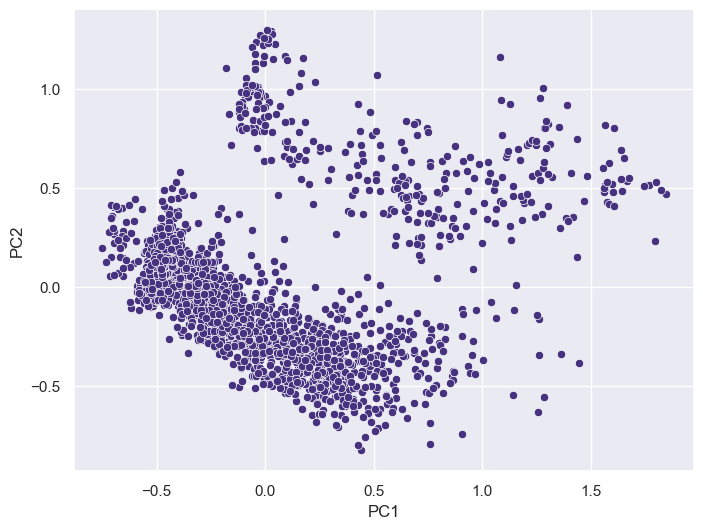

In [65]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=pca_df, x='PC1', y='PC2')

## 2- Clustering

Öncelikle KMeans ile clustering yapacağız. Bunun için önce optimal k değerini bulmamız lazım.

In [66]:
from sklearn.cluster import KMeans

In [67]:
dist = []

for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df)
    dist.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

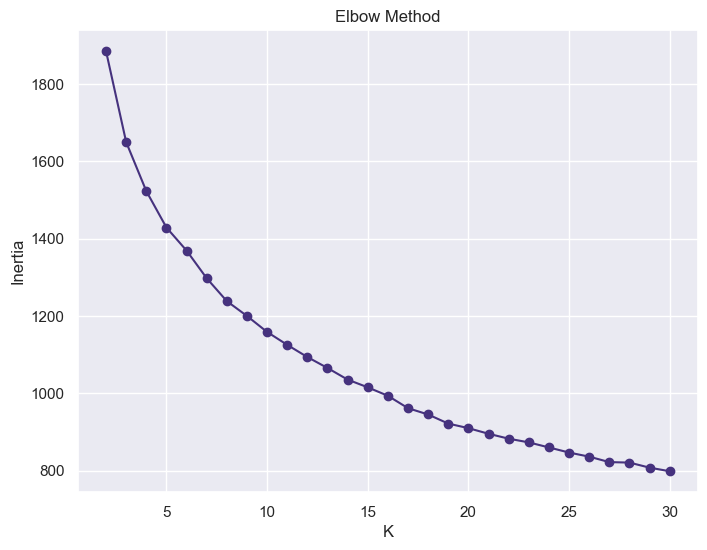

In [68]:
plt.figure(figsize=(8, 6))

plt.plot(range(2, 31), dist, marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Inertia')

4 iyi bir değer gibi görünüyor.

In [69]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, n_init=10, random_state=42)

<AxesSubplot: xlabel='Age', ylabel='Recency'>

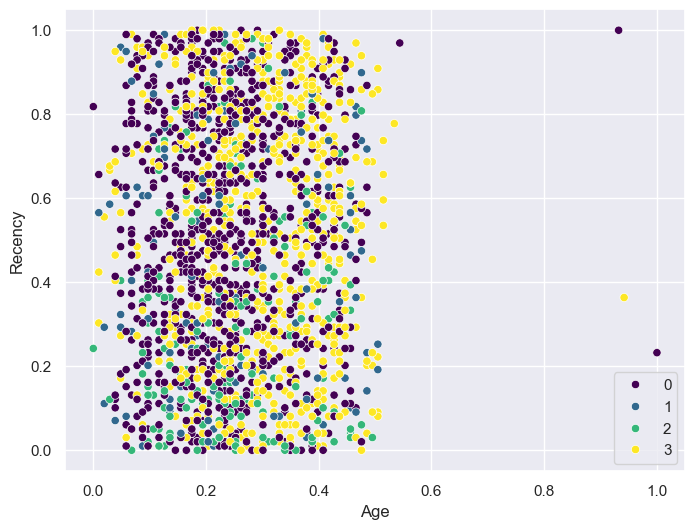

In [70]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Age', y='Recency', hue=kmeans.labels_, palette='viridis')

Text(0.5, 0, 'Response')

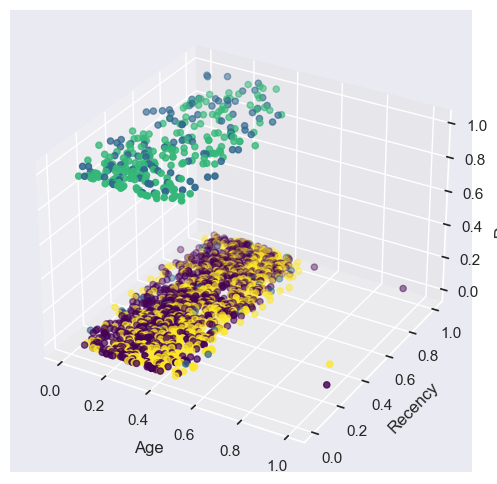

In [71]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Recency'], df['Response'], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Recency')
ax.set_zlabel('Response')

Clusterlar biraz görünür gibi, kesin bir şey diyemiyoruz. Bir de Agglomerative Clusestering deneyelim.

In [72]:
from sklearn.cluster import AgglomerativeClustering

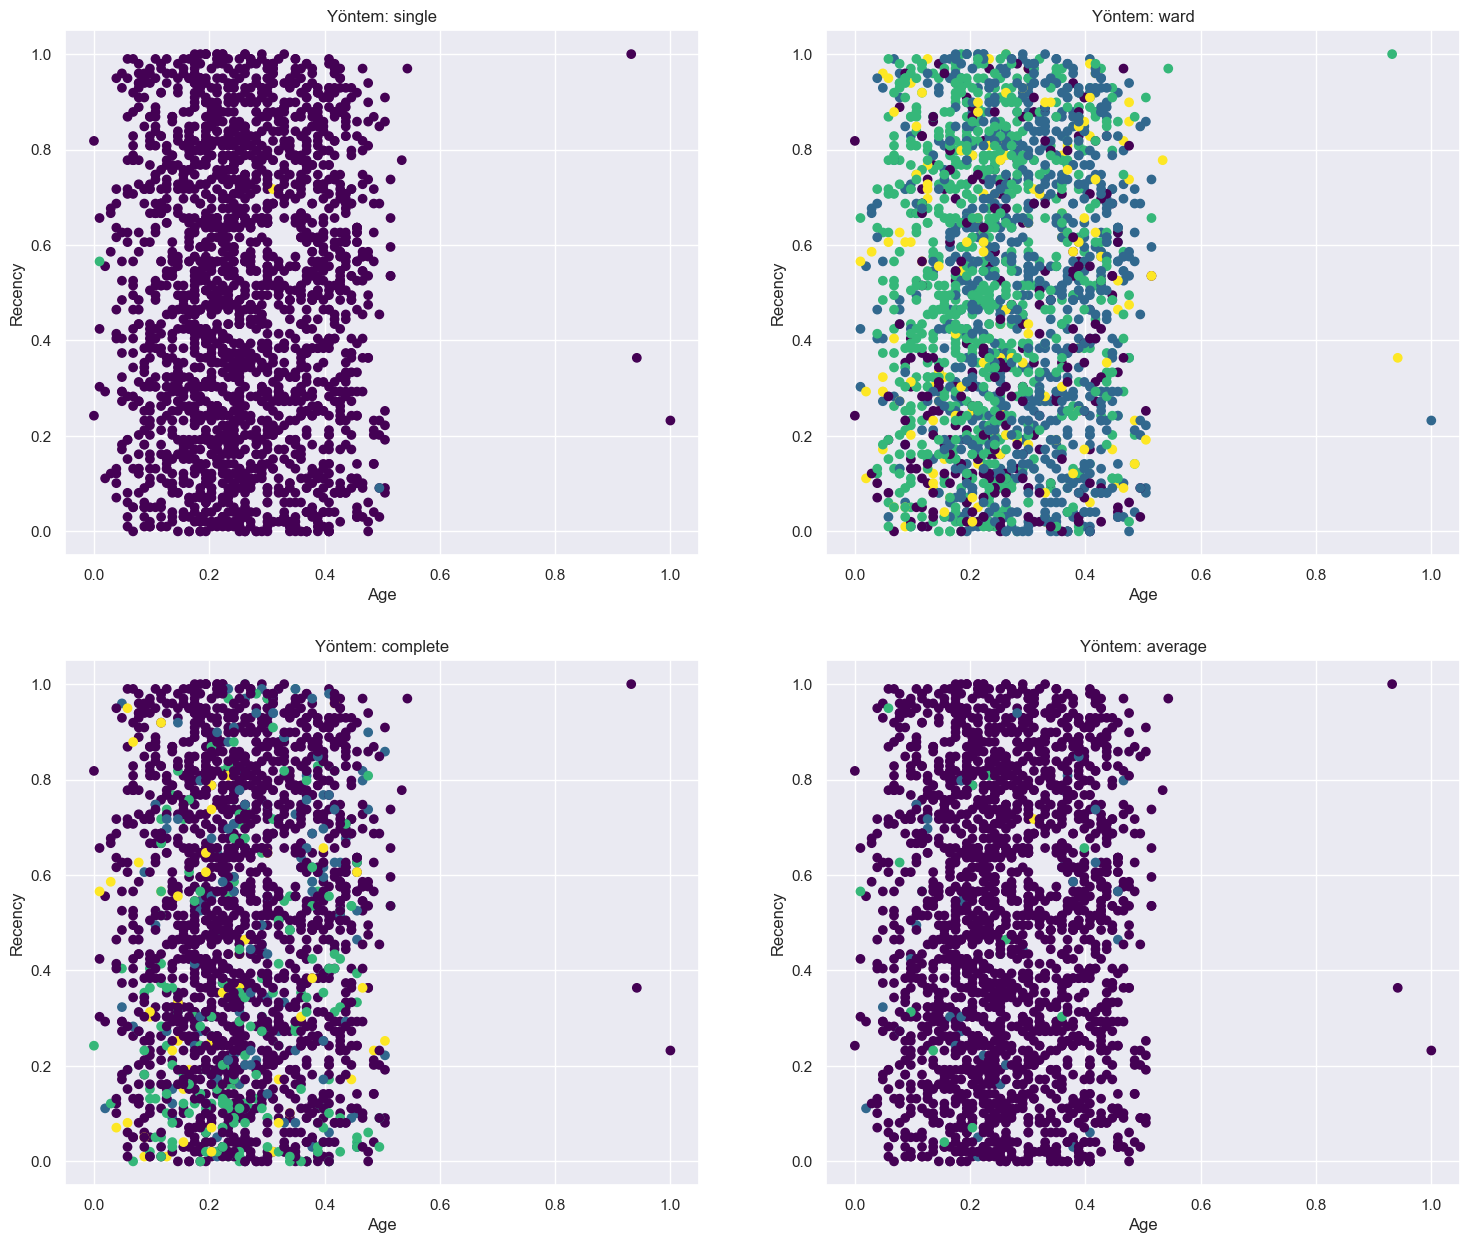

In [73]:
linkage_methods = ['single', 'ward', 'complete', 'average']

fig, axes = plt.subplots(2, 2, figsize=(18, 15))

for i, method in enumerate(linkage_methods):
    row = i // 2  
    col = i % 2

    hac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage=method)
    hac.fit(df)
    axes[row, col].scatter(df['Age'], df['Recency'], c=hac.labels_, cmap='viridis')
    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel('Recency')
    axes[row, col].set_title(f'Yöntem: {method}')

En iyi sonucu ward verdiği için yine onu kullanıyoruz.

Text(0.5, 0, 'Response')

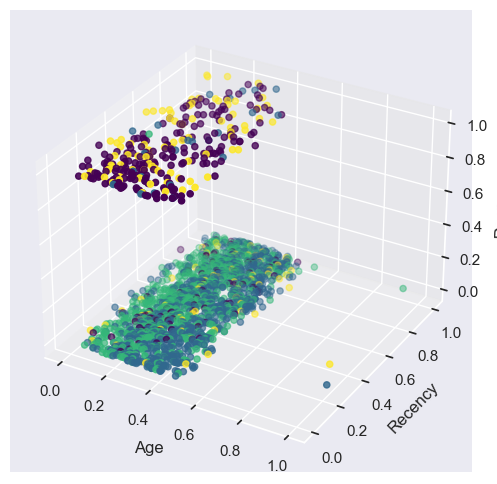

In [74]:
fig = plt.figure(figsize=(8, 6))

hac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hac.fit(df)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Recency'], df['Response'], c=hac.labels_, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Recency')
ax.set_zlabel('Response')

### Şimdi de PCA uyguladığımız veriye bakalım. 

In [75]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(pca_df)

KMeans(n_clusters=4, n_init=10, random_state=42)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

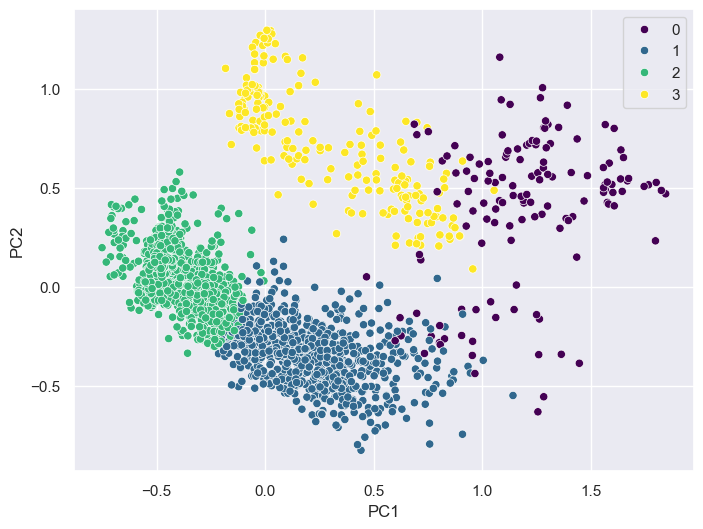

In [76]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=kmeans.labels_, palette='viridis')

Text(0.5, 0, 'PC3')

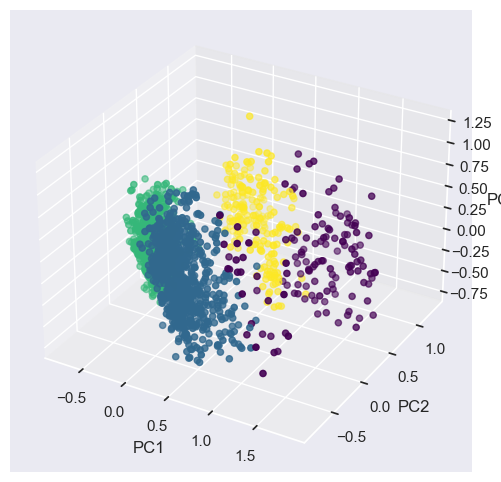

In [77]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

KMeans için PCA işe yaramış gibi görünüyor. HAC için de bakalım.

In [78]:
hac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hac.fit(pca_df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

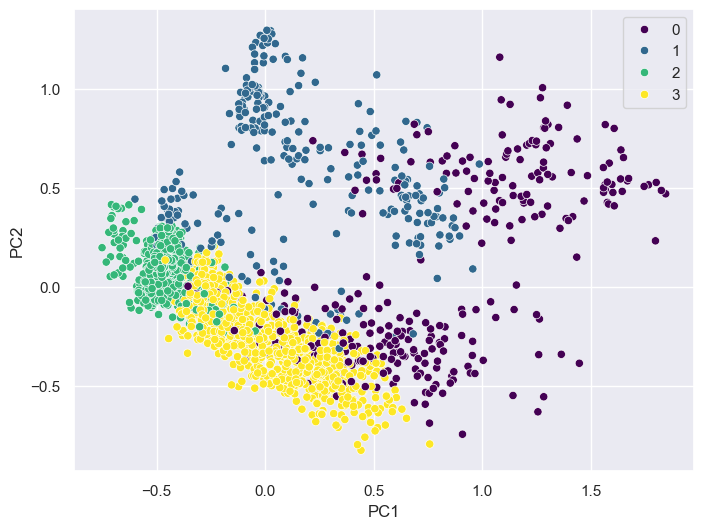

In [79]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=hac.labels_, palette='viridis')

Text(0.5, 0, 'PC3')

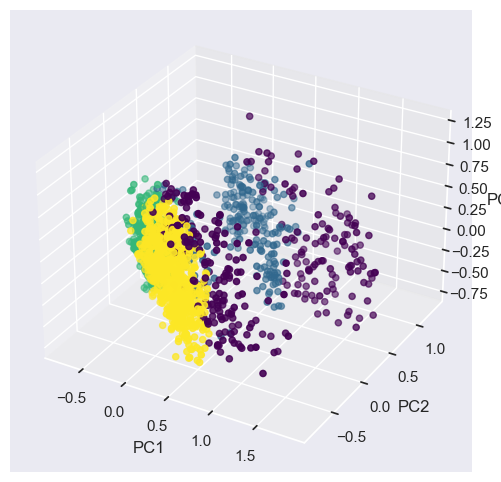

In [80]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=hac.labels_, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

KMeans güzel sonuç veriyor. Clusterların aralarındaki ilişkileri bu modelle inceleyelim.

In [81]:
kmeans = KMeans(n_clusters=4) 
df['Cluster'] = kmeans.fit_predict(df)

cluster_means = df.groupby('Cluster').mean()
cluster_means = scaler.inverse_transform(cluster_means)
cluster_means_df = pd.DataFrame(cluster_means, columns=df.columns[:-1])
pd.set_option('display.max_columns', None)

cluster_means_df

Education  Marital_Status        Income   Kidhome  Teenhome    Recency  \
0   1.732026        1.915033  82141.359477  0.039216  0.150327  49.117647   
1   1.698880        1.955182  65664.546218  0.068627  0.626050  51.380952   
2   1.593849        1.909862  37702.798515  0.787911  0.506893  50.915164   
3   1.852679        1.848214  51294.174107  0.459821  0.383929  31.857143   

     MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  870.679739  57.228758       470.176471        76.640523         65.836601   
1  491.308123  45.908964       264.551821        66.990196         47.142857   
2   62.895016   5.470838        32.885472         7.738070          5.339343   
3  345.625000  30.290179       220.504464        41.598214         28.736607   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0     76.640523           1.104575         5.496732             6.045752   
1     67.934174           2.431373         5.711485             4.324930   
2     17.638388           2.345705         2.486744             0.703075   
3     54.665179           2.848214         4.794643             3.375000   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0           8.267974           3.039216      0.143791      0.385621   
1           8.490196           4.147059      0.039216      0.095238   
2           3.453871           6.396607      0.048780      0.011665   
3           5.254464           6.107143      0.245536      0.075893   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response        Age  
0      0.960784      0.450980      0.111111  0.006536  0.575163  51.928105  
1      0.000000      0.057423      0.005602  0.009804  0.000000  55.295518  
2      0.000000      0.002121      0.001060  0.010604  0.000000  49.924708  
3      0.000000      0.093750      0.017857  0.008929  1.000000  52.071429

Öncekilere ek bazı çıkarım ve öneriler:
* Şarap ürünlerine en çok para harcayan kesim evinde en az çocuk/genç barındıran kesim.
* Şeker türü ürünlere en az para harcayan kesim ilginç bir şekilde evinde en çok çocuk bulunduran kesim. Bunun tam tersi beklenirdi. Şeker ürünleri stratejik olarak yanlış yerde bulunuyor olabilir. Oyuncak gibi ürünlerin yanlarına konumlandırılacak şeker türevi ürünler bu kategorideki genel satışı artırabilir. 
* İndirimden yararlanma miktarı gelir arttıkça azalıyor. İndirim miktarlarının artan satış miktarıyla zarara sebebiyet vermeyecek şekilde ayarlandığını göz önünde bulundurursak genel olarak orta kesime hitap eden ürünlere indirim, promosyon gibi hamleler uygulanırsa biraz daha verim elde edilebilir.
* İnternetten en az alışveriş yapan kesim geliri en az olan kesim. İnternet sayfasına özel can alıcı indirimler uygulanıp bu indirimler iyi bir şekilde tanıtılabilirse bu kesimden gelen internet alışverişi gelirleri de artacaktır.
* Gelir arttıkça katalog alışverişi artıyor. Katalogdaki ürünler geliri yüksek kesime hitap etmeyecek ürünlerden arındırılıp hedef kitlesinin daha çok ilgi ve beğenisini çekecek şekilde düzenlenebilir.
* Çocuk sayısı artıp gelir miktarı azaldıkça gıda alışverişinde dramatik bir düşüş görüyoruz. Bu belki de mağazadaki gıda ürünlerinin üst seviyede bulunan ürünler olmasından kaynaklanıyor olabilir. Böyle bir durum tespit edilirse bunun düzeltilmesi hem gıda kategorileri için hem de daha çok müşteri çekmiş olması itibariyle diğer ürün kalemlerinin gelirlerinin artmasını sağlayacaktır.
* Katalog alışverişi, üstte bahsedilen kesim için inanılmaz düşük. Sonuçların geri kalanı incelendiğinde katalogdaki ürünlerin yüksek gamdan ürünler olabileceği fikri ortaya çıkıyor. Eğer durum buysa daha alt kesimlere de hitap eden ürünler yerleştirilebilir. Bu yapılırken elbette halihazırdaki üst kesimdeki katalog müşterisini kaybetmemek için deney yoluyla farklı düzenlemeler denenebilir. Mesela iki ayrı kademedeki ürünlerin yan yana değil de, ayrı ayrı gruplandırılması iyi bir hamle olabilir. 
* Düşük kesimdeki müşterinin daha az kampanyadan yararlandığı, daha çok indirim kovaladığı ve daha çok şikayetçi olduğu görülüyor. Mağazanın genel politikasına aykırı düşmüyorsa ürünlerde bu kesimi hedef alan çeşitli düzenlemeler yapılabilir.